Import the Dataset and libraries:

In [11]:
import sklearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Generate the data set
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=400, noise=0.1, random_state=42)

In [13]:
X.shape

(400, 2)

Text(0.5, 1.0, 'Generated Half Moon data')

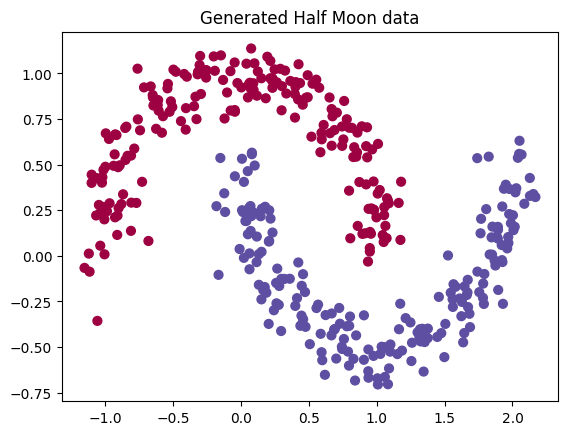

In [14]:
from pandas.plotting import scatter_matrix
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.title('Generated Half Moon data')

In [15]:
def net_input(W, X):
        """ Calculate net input """
        return np.dot(X, W[1:]) + W[0]  # Preceptron Update rule

In [16]:
def predict(W, X):
        """ Return class label after unit step """
        # Remember the equation: y = np.where(labels == 0, -1, 1)
        # .where(condition, If True, If False)
        return np.where(net_input(W, X) >= 0.0, 1, -1)

In [17]:
def plot_boundary(W,X):
        """ Function to plot the boundary defined by the weights. Given equation. """
        """ w0 + w1*x1 + w2*x2 = 0, used to generate the line """
        x_vals = []
        y_vals = [] # y_pred
        slope = - W[1]/W[2]
        intercept =  - W[0]/W[1]
        x_vals = np.linspace(-2,3,10)
        y_vals = slope*x_vals + intercept

        # Plotting
        plt.figure(figsize=(8,6))
        plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
        plt.plot(x_vals,y_vals,'-')  # Plot using the found values that form the line.
        plt.show()

In [18]:
def plot_errors(error):
    plt.plot(range(1, len(error) + 1), error, marker='o')
    plt.xlabel('Iterations')
    plt.show()

In [21]:
def fit(n_iter, X, y):
        W = np.zeros(1 + X.shape[1])
        errors_ = []  # List of errors
        for i in range(n_iter):
            for j, (xi, target) in enumerate(zip(X,y)):
                update = target - predict(W, xi)
                W[1:] += update * xi
                W[0] += update
          # Errors on whole dataset
            errors = 0
            for j, (xi, target) in enumerate(zip(X, y)):
                if predict(W, xi) != target:
                    errors += 1
            # -----------------------------
            errors_.append(errors)
            i += 1
        print("Iteration: ", i)
        print("Weights: ", W)
        plot_boundary(W,X)  # When weights are updated we plot the boundary
        plot_errors(errors_)

Iteration:  100
Weights:  [ 2.          1.66291036 -2.10485485]


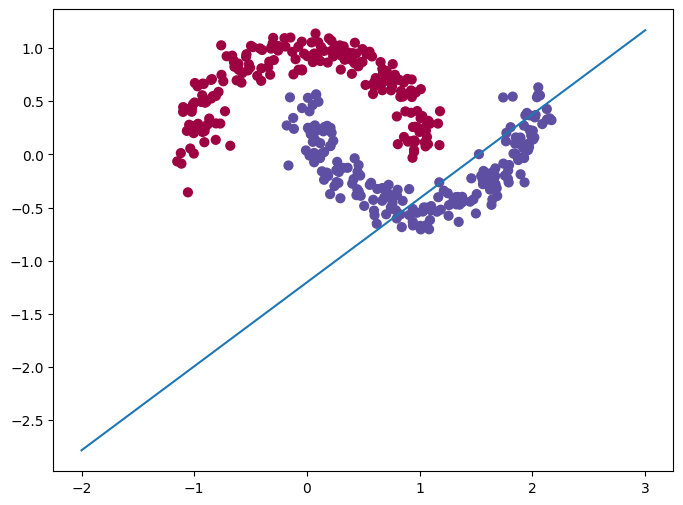

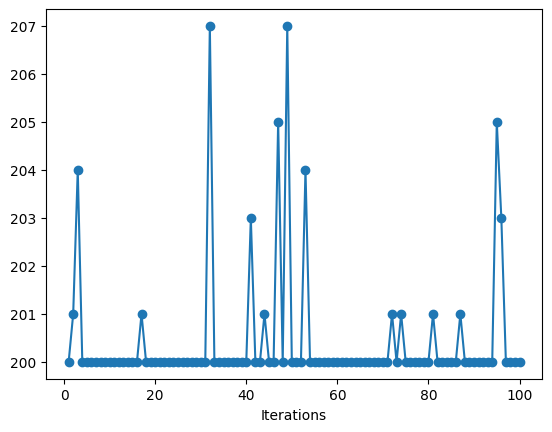

In [22]:
n_iter = 100
fit(n_iter, X, y)